In [136]:
import numpy as np
import hiive.mdptoolbox.mdp as mdp
import hiive.mdptoolbox.example as example
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt 


import the forest problem example 

In [137]:
P, R = example.forest(S=500)


In [138]:
gamma = np.linspace(.1,1,num=20)

plots needed: 
-value iteration vs convergence for pi and vi (with wall clock time)
-q learning curve per 100
-gamma hyper parameters for all algorithms 

bonus: 

q learning hyper parameter vs success after n episodes? 


Policy Iteration 

In [139]:
'''pi_mean_value = []
pi_iterations = []
pi_time_value = []'''


p= mdp.PolicyIterationModified(P,R,.9,max_iter=1000)
p.run()
'''pi_mean_value.append(np.mean(p.V))
pi_iterations.append(p.iter)
pi_time_value.append(p.time)
'''
 
p.iter   


11

In [140]:
p = mdp.PolicyIterationModified(P,R,.9)
p.run()
p.run_stats

Value-Iteration 

In [141]:
v = mdp.ValueIteration(P, R, .96)
v_stats = v.run()
v_curve = []
for v in v_stats: 
    v_curve.append(v['Reward'])
    
p = mdp.PolicyIteration(P, R, .96)
p_stats = p.run()
p_curve = []
for p in p_stats: 
    p_curve.append(p['Reward'])
    
q = mdp.QLearning(P,R, .96)
q_stats = q.run()
q_curve = []
for q in q_stats: 
    q_curve.append(q['Reward'])
    


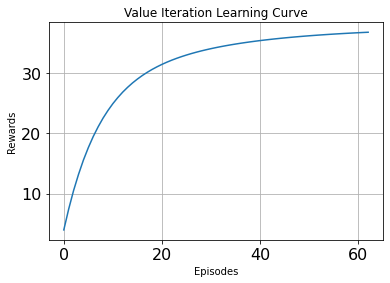

<Figure size 1440x720 with 0 Axes>

In [142]:
plt.plot(v_curve)

plt.title('Value Iteration Learning Curve')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

plt.grid()
plt.tick_params(labelsize=16)
plt.figure(figsize=(20,10))
plt.show()


In [143]:
vi_mean_value = []
vi_iterations = []
vi_time_value = []


for g in gamma:    
    v = mdp.ValueIteration(P,R,g,max_iter=5000)
    v.run()
    vi_mean_value.append(np.mean(v.V))
    vi_iterations.append(v.iter)
    vi_time_value.append(v.time)
    


Q-Learning 

In [144]:
q_mean_value = []
q_time_value = []
q_policy = []


In [145]:
'''def q_learn(P,R,gamma, alpha=0.1, alpha_decay=0.99, epsilon=1.0, epsilon_decay=0.001, n_iter=10000,verbose = True):
    
    q = mdp.QLearning(P, R, gamma,
                 alpha=alpha, alpha_decay=alpha_decay, alpha_min=0.001,
                 epsilon=epsilon, epsilon_min=0.1, epsilon_decay=epsilon_decay,
                 n_iter=n_iter, skip_check=False, iter_callback=None,
                 run_stat_frequency=None)
    
        
    q.run()
    
    return q'''


'def q_learn(P,R,gamma, alpha=0.1, alpha_decay=0.99, epsilon=1.0, epsilon_decay=0.001, n_iter=10000,verbose = True):\n    \n    q = mdp.QLearning(P, R, gamma,\n                 alpha=alpha, alpha_decay=alpha_decay, alpha_min=0.001,\n                 epsilon=epsilon, epsilon_min=0.1, epsilon_decay=epsilon_decay,\n                 n_iter=n_iter, skip_check=False, iter_callback=None,\n                 run_stat_frequency=None)\n    \n        \n    q.run()\n    \n    return q'

In [146]:
'''q = q_learn(P,R,gamma = .9, alpha_decay = .99, epsilon=1.0, epsilon_decay=.75)'''

'q = q_learn(P,R,gamma = .9, alpha_decay = .99, epsilon=1.0, epsilon_decay=.75)'

In [148]:

p = mdp.PolicyIteration(P, R, .9)
p_stats = p.run()
p_curve = []
for p in p_stats: 
    p_curve.append(p['Reward'])

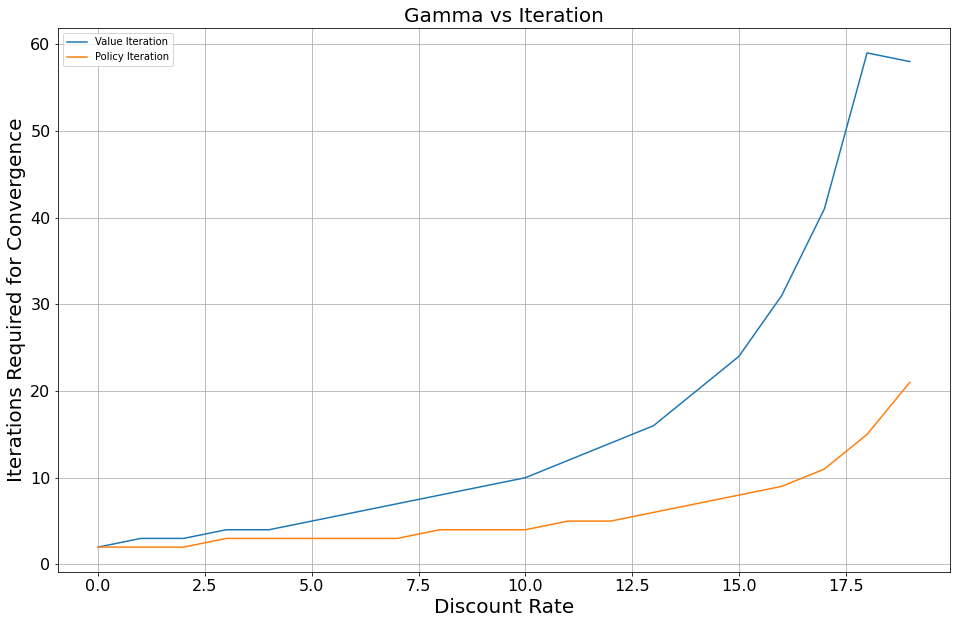

In [ ]:

plt.figure(figsize=(16,10))
plt.plot(vi_iterations, label = "Value Iteration")
#plt.plot(pi_iterations, label = "Policy Iteration")
#plt.plot(q_it, label = "Q-Learning")
plt.legend()
plt.title('Gamma vs Iteration',fontsize = 20)
plt.xlabel('Discount Rate',fontsize = 20)
plt.ylabel('Iterations Required for Convergence',fontsize = 20)
plt.tick_params(labelsize=16)
plt.grid()
plt.show()

In [ ]:
vi_iterations

[63, 63, 63, 63, 63, 63, 63, 63, 63, 63]